<a href="https://colab.research.google.com/github/lekhchettri/devnagari-ocr/blob/main/devnagari_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                  title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows               Netflix Movies and TV Shows                      1MB  2024-04-10 09:48:38           6202        130  1.0              
nikkiperry/2023-air-quality-data-for-cbsas           2023 Air Quality Data for CBSAs                162KB  2024-04-23 18:44:12            744         22  1.0              
prishasawhney/mushroom-dataset                       Mushroom Dataset (Binary Classification)       602KB  2024-04-18 19:56:44           1288         63  1.0              
mexwell/heart-disease-dataset                        🫀 Heart Disease Dataset                        399KB  2024-04-08 09:43:49           327

In [ ]:
files.upload()

In [ ]:
! kaggle datasets download bigyanchapagain/self-compounded-devanagari-characters

In [ ]:

! kaggle datasets download ashokpant/devanagari-character-dataset

 97% 8.00M/8.24M [00:01<00:00, 12.8MB/s]
100% 8.24M/8.24M [00:01<00:00, 7.93MB/s]


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input, BatchNormalization
from tensorflow.keras.utils import plot_model
%matplotlib inline
import matplotlib.pyplot as plt
import itertools

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn import metrics
import numpy as np
import os
import shutil

cons_src = '/content/nhcd/nhcd/consonants'
nume_src = '/content/nhcd/nhcd/numerals'
vowe_src = '/content/nhcd/nhcd/vowels'
comp_src_train = '/content/self_compounded_devanagari_chars/data/train'
comp_src_valid = '/content/self_compounded_devanagari_chars/data/validation'
data_path = '/content/data'

In [ ]:
if os.path.exists(data_path):
    # If it exists, remove it and all its contents
    shutil.rmtree(data_path)

# Create the data_path directory
os.mkdir(data_path)

In [ ]:
!unzip /content/self-compounded-devanagari-characters.zip

Archive:  /content/self-compounded-devanagari-characters.zip
  inflating: check_image.png         
  inflating: self_compounded_devanagari_chars/data/train/bra/1.png  
  inflating: self_compounded_devanagari_chars/data/train/bra/10.png  
  inflating: self_compounded_devanagari_chars/data/train/bra/100.png  
  inflating: self_compounded_devanagari_chars/data/train/bra/101.png  
  inflating: self_compounded_devanagari_chars/data/train/bra/102.png  
  inflating: self_compounded_devanagari_chars/data/train/bra/103.png  
  inflating: self_compounded_devanagari_chars/data/train/bra/104.png  
  inflating: self_compounded_devanagari_chars/data/train/bra/105.png  
  inflating: self_compounded_devanagari_chars/data/train/bra/106.png  
  inflating: self_compounded_devanagari_chars/data/train/bra/107.png  
  inflating: self_compounded_devanagari_chars/data/train/bra/108.png  
  inflating: self_compounded_devanagari_chars/data/train/bra/109.png  
  inflating: self_compounded_devanagari_chars/data/t

In [ ]:
! unzip /content/devanagari-character-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: nhcd/nhcd/numerals/1/027_03.jpg  
  inflating: nhcd/nhcd/numerals/1/028_01.jpg  
  inflating: nhcd/nhcd/numerals/1/028_02.jpg  
  inflating: nhcd/nhcd/numerals/1/028_03.jpg  
  inflating: nhcd/nhcd/numerals/1/028_04.jpg  
  inflating: nhcd/nhcd/numerals/1/028_05.jpg  
  inflating: nhcd/nhcd/numerals/1/029_01.jpg  
  inflating: nhcd/nhcd/numerals/1/030_01.jpg  
  inflating: nhcd/nhcd/numerals/1/030_02.jpg  
  inflating: nhcd/nhcd/numerals/1/030_03.jpg  
  inflating: nhcd/nhcd/numerals/1/030_04.jpg  
  inflating: nhcd/nhcd/numerals/1/032_01.jpg  
  inflating: nhcd/nhcd/numerals/1/032_02.jpg  
  inflating: nhcd/nhcd/numerals/1/033_01.jpg  
  inflating: nhcd/nhcd/numerals/1/033_02.jpg  
  inflating: nhcd/nhcd/numerals/1/034_01.jpg  
  inflating: nhcd/nhcd/numerals/1/034_02.jpg  
  inflating: nhcd/nhcd/numerals/1/035_01.jpg  
  inflating: nhcd/nhcd/numerals/1/035_02.jpg  
  inflating: nhcd/nhcd/numerals/1/036_01.jpg  
  inflati

In [ ]:
# copy consonants
for srcroot, srcdirs, srcfiles in os.walk(cons_src):
    for srcdirname in srcdirs:
        # create folder for a class
        dstdir_name = os.path.join(data_path, f'c_{srcdirname}')
        os.mkdir(dstdir_name)
        # copy files for the class
        for _, _, srcfiles in os.walk(os.path.join(srcroot, srcdirname)):
            for srcfilename in srcfiles:
                shutil.copy(src=os.path.join(srcroot, srcdirname, srcfilename), \
                                dst=os.path.join(dstdir_name))
#for numerals
for srcroot, srcdirs, srcfiles in os.walk(nume_src):
    for srcdirname in srcdirs:
        # create folder for a class
        dstdir_name = os.path.join(data_path, f'n_{srcdirname}')
        os.mkdir(dstdir_name)
        # copy files for the class
        for _, _, srcfiles in os.walk(os.path.join(srcroot, srcdirname)):
            for srcfilename in srcfiles:
                shutil.copy(src=os.path.join(srcroot, srcdirname, srcfilename), \
                                dst=os.path.join(dstdir_name))

# copy vowels
for srcroot, srcdirs, srcfiles in os.walk(vowe_src):
    for srcdirname in srcdirs:
        # create folder for a class
        dstdir_name = os.path.join(data_path, f'v_{srcdirname}')
        os.mkdir(dstdir_name)
        # copy files for the class
        for _, _, srcfiles in os.walk(os.path.join(srcroot, srcdirname)):
            for srcfilename in srcfiles:
                shutil.copy(src=os.path.join(srcroot, srcdirname, srcfilename), \
                                dst=os.path.join(dstdir_name))



# for compound training
for srcroot, srcdirs, srcfiles in os.walk(comp_src_train):
    for srcdirname in srcdirs:
        # create folder for a class
        dstdir_name = os.path.join(data_path, f'j_{srcdirname}')
        os.mkdir(dstdir_name)
        # copy files for the class
        for _, _, srcfiles in os.walk(os.path.join(srcroot, srcdirname)):
            for srcfilename in srcfiles:
                shutil.copy(src=os.path.join(srcroot, srcdirname, srcfilename), \
                                dst=os.path.join(dstdir_name))

# for compound validation
for srcroot, srcdirs, srcfiles in os.walk(comp_src_valid):
    for srcdirname in srcdirs:
        # create folder for a class
        dstdir_name = os.path.join(data_path, f'j_{srcdirname}')
        #os.mkdir(dstdir_name)
        # copy files for the class
        for _, _, srcfiles in os.walk(os.path.join(srcroot, srcdirname)):
            for srcfilename in srcfiles:
                shutil.copy(src=os.path.join(srcroot, srcdirname, srcfilename), \
                                dst=os.path.join(dstdir_name))


In [ ]:
i = 0

for srcroot, srcdirs, srcfiles in os.walk('/content/data'):
    for filename in srcfiles:
        i += 1
        # Uncomment the line below to see each of the image files present
        # print(filename)

print(f'{i} files')

17092 files


In [ ]:
training_set_generator = ImageDataGenerator(rescale=1 / 255.0, rotation_range=20, zoom_range=0.05, width_shift_range=0.05, height_shift_range=0.05, shear_range=0.05,horizontal_flip=True, fill_mode="nearest", validation_split=0.20)
testing_set_generator = ImageDataGenerator(rescale=1 / 255.0)

training_set_path = "/content/data"
classes = 77

In [ ]:
batch_size = 8
train_gen = training_set_generator.flow_from_directory(
    directory=training_set_path,
    target_size=(28, 28),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_gen = training_set_generator.flow_from_directory(
    directory=training_set_path,
    target_size=(28, 28),
    color_mode="grayscale",
    class_mode="categorical",
    subset='validation',
    shuffle=False,
    seed=42
)

Found 13682 images belonging to 77 classes.
Found 3410 images belonging to 77 classes.


In [ ]:
label_map = train_gen.class_indices

print("Label Map (Class Indices):", label_map)

label_table = pd.DataFrame(label_map, index=range(len(label_map)))
print(label_table)
label_table.to_excel('labels.xlsx', index=False)

Label Map (Class Indices): {'c_1': 0, 'c_10': 1, 'c_11': 2, 'c_12': 3, 'c_13': 4, 'c_14': 5, 'c_15': 6, 'c_16': 7, 'c_17': 8, 'c_18': 9, 'c_19': 10, 'c_2': 11, 'c_20': 12, 'c_21': 13, 'c_22': 14, 'c_23': 15, 'c_24': 16, 'c_25': 17, 'c_26': 18, 'c_27': 19, 'c_28': 20, 'c_29': 21, 'c_3': 22, 'c_30': 23, 'c_31': 24, 'c_32': 25, 'c_33': 26, 'c_34': 27, 'c_35': 28, 'c_36': 29, 'c_4': 30, 'c_5': 31, 'c_6': 32, 'c_7': 33, 'c_8': 34, 'c_9': 35, 'j_bra': 36, 'j_dda': 37, 'j_dma': 38, 'j_dra': 39, 'j_dwa': 40, 'j_dya': 41, 'j_gri': 42, 'j_hra': 43, 'j_hri': 44, 'j_hya': 45, 'j_kra': 46, 'j_mra': 47, 'j_mri': 48, 'j_pra': 49, 'j_rhi': 50, 'j_shra': 51, 'j_tra': 52, 'j_traw': 53, 'j_tta': 54, 'n_0': 55, 'n_1': 56, 'n_2': 57, 'n_3': 58, 'n_4': 59, 'n_5': 60, 'n_6': 61, 'n_7': 62, 'n_8': 63, 'n_9': 64, 'v_1': 65, 'v_10': 66, 'v_11': 67, 'v_12': 68, 'v_2': 69, 'v_3': 70, 'v_4': 71, 'v_5': 72, 'v_6': 73, 'v_7': 74, 'v_8': 75, 'v_9': 76}
    c_1  c_10  c_11  c_12  c_13  c_14  c_15  c_16  c_17  c_18  ..

In [ ]:
def create_model():

    model = Sequential(
        [
            Input(shape=(28, 28, 1)),
            Conv2D(32, kernel_size=(3, 3), activation="relu"),
            BatchNormalization(),
            Conv2D(32, kernel_size=(3, 3), activation="relu"),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, kernel_size=(3, 3), activation="relu"),
            BatchNormalization(),
            Conv2D(64, kernel_size=(3, 3), activation="relu"),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dropout(0.5),
            Dense(classes, activation="softmax"),
        ]
    )
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                        

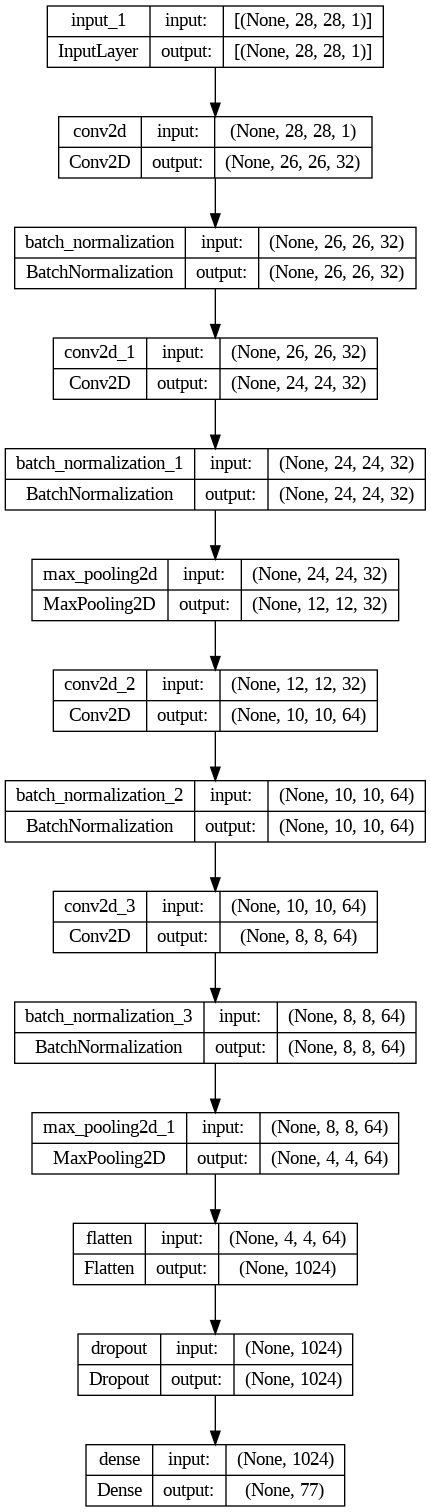

In [ ]:
model = create_model()
model_json = model.to_json()
with open("/content/model.json", "w") as json_file:
    json_file.write(model_json)
model.summary()

plot_model(model, to_file='/content/model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_file="/content/best_model.keras"
bm = ModelCheckpoint(model_file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_accuracy', patience=20)
callbacks_list = [bm, es]


history = model.fit(train_gen,
            validation_data = valid_gen,
            steps_per_epoch = train_gen.n//train_gen.batch_size,
            validation_steps = valid_gen.n//valid_gen.batch_size,
            epochs=1000,
            callbacks=callbacks_list)

print('Training stopped')

Epoch 1/1000
1709/1710 [============================>.] - ETA: 0s - loss: 3.2073 - accuracy: 0.2705
Epoch 1: val_accuracy improved from -inf to 0.38620, saving model to /content/best_model.keras
1710/1710 [==============================] - 62s 35ms/step - loss: 3.2065 - accuracy: 0.2706 - val_loss: 2.3431 - val_accuracy: 0.3862
Epoch 2/1000
1710/1710 [==============================] - ETA: 0s - loss: 1.7946 - accuracy: 0.4931
Epoch 2: val_accuracy did not improve from 0.38620
1710/1710 [==============================] - 57s 33ms/step - loss: 1.7946 - accuracy: 0.4931 - val_loss: 2.2260 - val_accuracy: 0.3718
Epoch 3/1000
1708/1710 [============================>.] - ETA: 0s - loss: 1.4076 - accuracy: 0.5857
Epoch 3: val_accuracy improved from 0.38620 to 0.54923, saving model to /content/best_model.keras
1710/1710 [==============================] - 55s 32ms/step - loss: 1.4077 - accuracy: 0.5856 - val_loss: 1.5205 - val_accuracy: 0.5492
Epoch 4/1000
1708/1710 [===========================

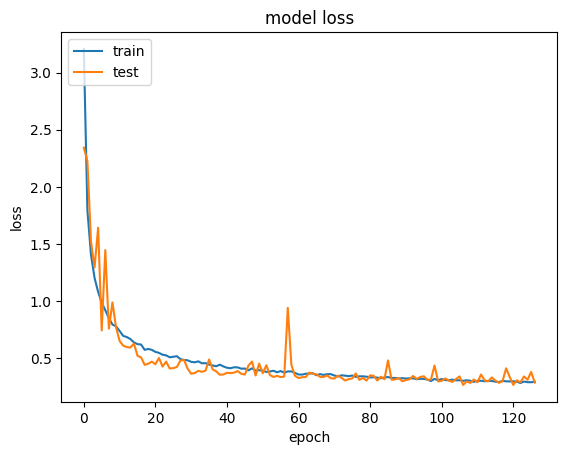

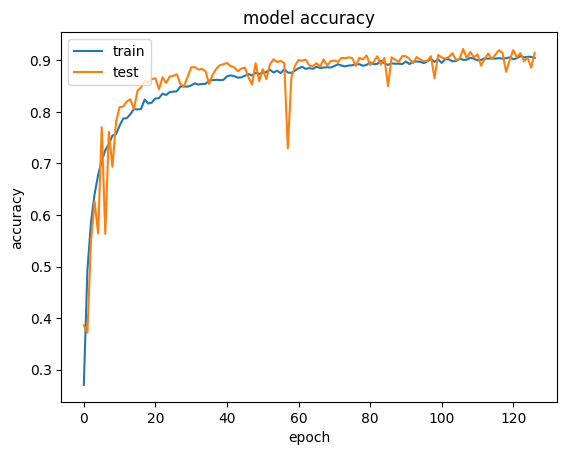

In [ ]:
# loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# loading best model
json_file = open('/content/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
best_model = model_from_json(loaded_model_json)
# load weights into new model
best_model.load_weights("/content/best_model.keras")
best_model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
print("Loaded model from disk")

score = best_model.evaluate(valid_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Loaded model from disk
107/107 [==============================] - 4s 35ms/step - loss: 0.2890 - accuracy: 0.9167
Test loss: 0.28904739022254944
Test accuracy: 0.9167155623435974


In [ ]:
predict=best_model.predict(valid_gen)
# predict the class label
y_predicted = predict.argmax(axis=-1)

107/107 [==============================] - 4s 35ms/step


In [ ]:
y_actual = valid_gen.labels

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_actual, y_predicted)

In [ ]:


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm_normalized

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]), horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]), horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))

    return plt

# Example usage:
# plot_confusion_matrix(cm=your_confusion_matrix, target_names=your_class_names).show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

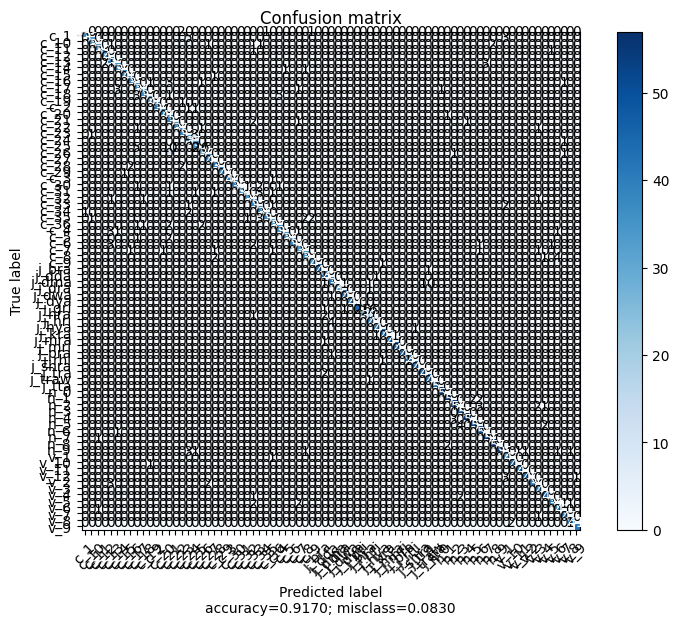

In [ ]:
cls_lbl = []

for item in valid_gen.class_indices.items():
    cls_lbl.append(item[0])


plot_confusion_matrix(confusion_matrix,
                          target_names=cls_lbl,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)

In [ ]:
cls_lbl = []

for item in valid_gen.class_indices.items():
    cls_lbl.append(item[0])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_actual, y_predicted, average=None)
recall = recall_score(y_actual, y_predicted, average=None)
f1 = f1_score(y_actual, y_predicted, average=None)

# Print results for each class
for class_label in range(len(precision)):
    print("Class:", class_label)
    print("Precision:", precision[class_label])
    print("Recall:", recall[class_label])
    print("F1 Score:", f1[class_label])

Class: 0
Precision: 0.9736842105263158
Recall: 0.9024390243902439
F1 Score: 0.9367088607594938
Class: 1
Precision: 0.9428571428571428
Recall: 0.8048780487804879
F1 Score: 0.868421052631579
Class: 2
Precision: 0.9459459459459459
Recall: 0.8536585365853658
F1 Score: 0.8974358974358975
Class: 3
Precision: 0.9512195121951219
Recall: 0.9512195121951219
F1 Score: 0.9512195121951219
Class: 4
Precision: 0.7735849056603774
Recall: 1.0
F1 Score: 0.8723404255319149
Class: 5
Precision: 0.875
Recall: 0.8536585365853658
F1 Score: 0.8641975308641976
Class: 6
Precision: 0.975
Recall: 0.9512195121951219
F1 Score: 0.9629629629629629
Class: 7
Precision: 0.9302325581395349
Recall: 0.975609756097561
F1 Score: 0.9523809523809524
Class: 8
Precision: 0.7446808510638298
Recall: 0.8536585365853658
F1 Score: 0.7954545454545454
Class: 9
Precision: 0.9473684210526315
Recall: 0.8780487804878049
F1 Score: 0.9113924050632912
Class: 10
Precision: 0.9411764705882353
Recall: 0.7804878048780488
F1 Score: 0.85333333333333

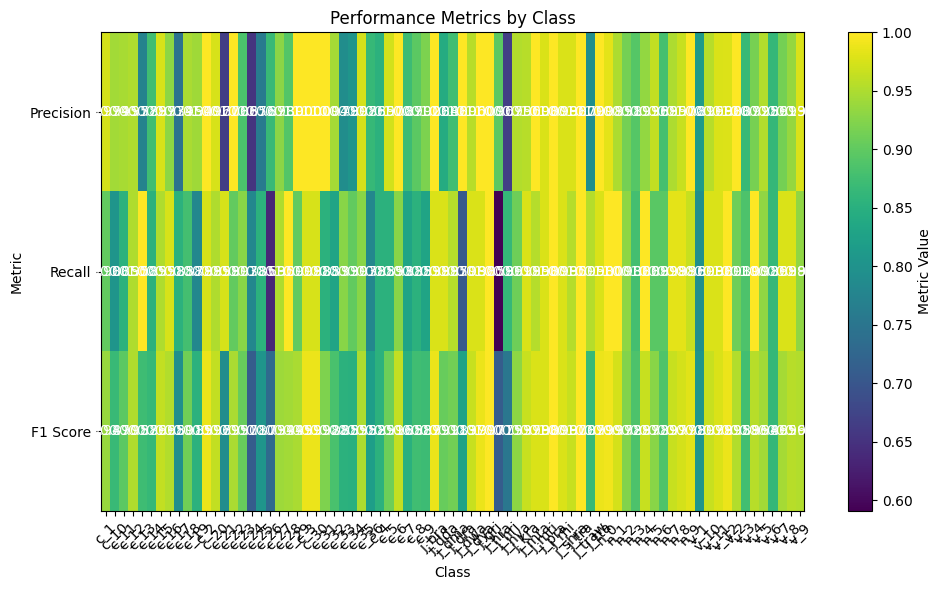

In [ ]:
metrics = np.vstack((precision, recall, f1))
class_label = cls_lbl

# Create heatmap
plt.figure(figsize=(10, 6))
plt.imshow(metrics, cmap='viridis', aspect='auto')

# Set tick labels and axis labels
plt.xticks(np.arange(len(class_label)), class_label, rotation=45)
plt.yticks(np.arange(3), ['Precision', 'Recall', 'F1 Score'])

# Add color bar
plt.colorbar(label='Metric Value')

# Add text annotations
for i in range(len(class_label)):
    for j in range(3):
        plt.text(i, j, f'{metrics[j, i]:.2f}', ha='center', va='center', color='white')

# Add title and labels
plt.title('Performance Metrics by Class')
plt.xlabel('Class')
plt.ylabel('Metric')

# Show plot
plt.tight_layout()
plt.show()

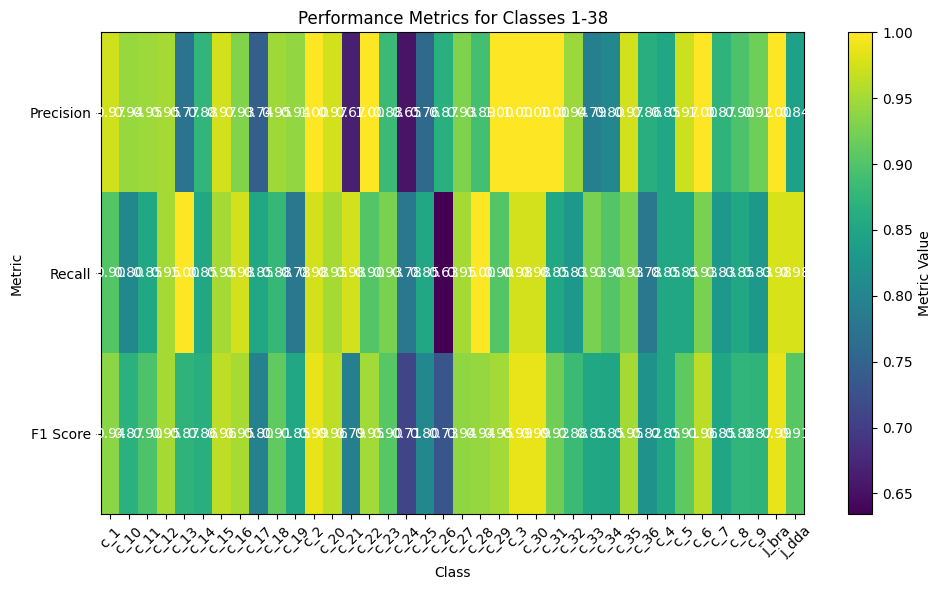

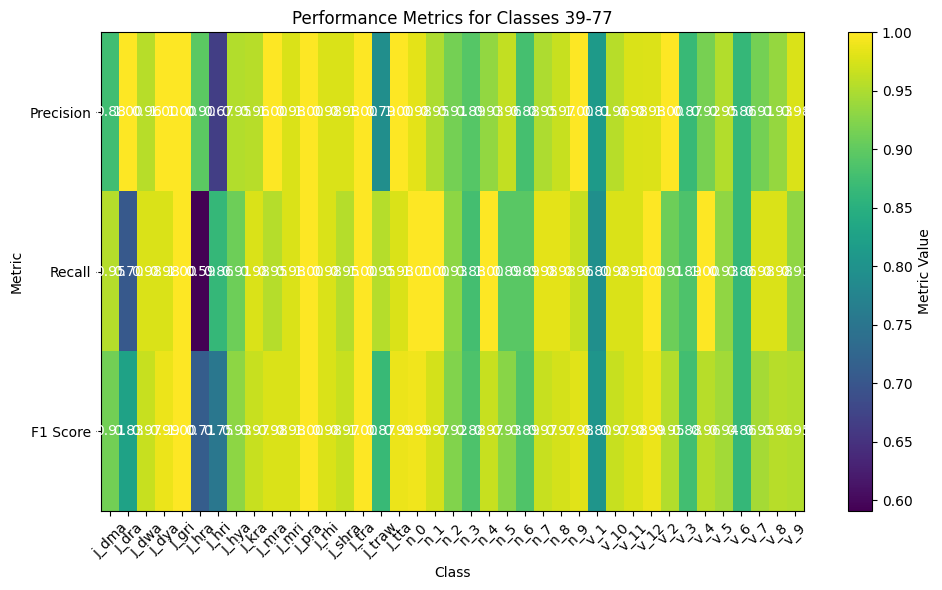

In [ ]:
# Split metrics and class_label arrays into two separate arrays for the first 38 classes and the remaining classes
metrics_1_38 = metrics[:, :38]
metrics_39_77 = metrics[:, 38:]
class_label_1_38 = class_label[:38]
class_label_39_77 = class_label[38:]

# Define a function to plot heatmap
def plot_heatmap(metrics, class_label, title):
    plt.figure(figsize=(10, 6))
    plt.imshow(metrics, cmap='viridis', aspect='auto')

    # Set tick labels and axis labels
    plt.xticks(np.arange(len(class_label)), class_label, rotation=45)
    plt.yticks(np.arange(3), ['Precision', 'Recall', 'F1 Score'])

    # Add color bar
    plt.colorbar(label='Metric Value')

    # Add text annotations
    for i in range(len(class_label)):
        for j in range(3):
            plt.text(i, j, f'{metrics[j, i]:.2f}', ha='center', va='center', color='white')

    # Add title and labels
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Metric')

    # Show plot
    plt.tight_layout()
    plt.show()

# Plot heatmap for the first 38 classes
plot_heatmap(metrics_1_38, class_label_1_38, 'Performance Metrics for Classes 1-38')

# Plot heatmap for the remaining classes
plot_heatmap(metrics_39_77, class_label_39_77, 'Performance Metrics for Classes 39-77')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp best_model.keras /OCRRESULTS